In [1]:
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file

# For visvalization
import matplotlib.pyplot as plt

from pandas import DataFrame

import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.ar_model import AR

from matplotlib.font_manager import FontProperties

%matplotlib inline

# 1. Analyze the Overall Condition of Health Life Expectancy

In [2]:
df_h_health = pd.read_csv('../dataset/correlation_clustered_data/HLE_clustered_cleaned_data_WA.csv')
df_h_health = df_h_health.iloc[2:]
df_h_health

,Healthy life expectancy at birth,Log GDP per capita,Selected,Country name,Cluster,Silhouette
2,0.44987288274684883,0.20074712983785067,No,Afghanistan,C1,0.6774429348167537
3,0.7983659401260507,0.5544295182861878,No,Albania,C4,0.6011381080475344
4,0.7408034893644959,0.5343479997632856,No,Algeria,C4,0.671766671976053
5,0.8054917279411765,0.6726254586341579,No,Argentina,C2,0.6493071011092246
6,0.7600434118960085,0.5418710794176826,No,Armenia,C4,0.6607755658401884
...,...,...,...,...,...,...
138,0.7576811974789917,0.5450282577819862,No,Venezuela,C4,0.6604369770791874
139,0.7850001641281512,0.4291772694993491,No,Vietnam,C4,0.6480377686097432
140,0.5220287880777312,0.25678704580423733,No,Yemen,C1,0.5630794215070095
141,0.47931066176470594,0.2901445437329862,No,Zambia,C1,0.605355583291781


In [3]:
c3_health_countries = df_h_health[df_h_health['Cluster'] == 'C3']['Country name']

In [4]:
c3_list = c3_health_countries.values.tolist()
print(c3_list)

['Australia', 'Austria', 'Belgium', 'Canada', 'Cyprus', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong S.A.R. of China', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'North Cyprus', 'Norway', 'Portugal', 'Singapore', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan Province of China', 'United Kingdom', 'United States']


In [5]:
invalid = ['Somalia', 'Maldives', 'Central African Republic', 'Gambia', 
                     'Lesotho', 'North Cyprus', 'Syria', 'Comoros', 'Belize'
                     , 'Cuba', 'Oman', 'Suriname', 'Djibouti', 
                     'Somaliland region', 'Kosovo', 'Palestinian Territories',
                     'Burundi', 'Qatar', 'South Sudan', 'Swaziland', 'Bhutan',
                     'Taiwan Province of China', 'Hong Kong S.A.R. of China',
                     'Angola', 'Namibia', 'Libya', 'Trinidad and Tobago', 
                     'Sudan', 'Jamaica', 'Guyana']

for country in c3_list:
    if country in invalid:
        c3_list.remove(country)
        print("Removed ", country)

Removed  Hong Kong S.A.R. of China
Removed  North Cyprus
Removed  Taiwan Province of China


In [6]:
df_ts = pd.read_csv('../dataset/normalized_filled_clean_data/normalized-filled-clean-world-happiness-report.csv')

In [7]:
df_c3 = df_ts[df_ts['Country name'].isin(c3_list)]

In [8]:
def get_yrly_avg_dict(df, years, col_item):
    avg_trend = {}
    for year in years:
        mean = df[df['year'] == year][col_item].mean()
        avg_trend[year] = mean
#     print(avg_trend)
    return avg_trend

In [9]:
#2006 - 2021
init = 2006
years = []
for i in range(16):
    years.append(init)
    init += 1

def plot_by_dict(dis_dict, title, xlabel, ylabel):
    fig = plt.figure()
    fig.suptitle(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=16)
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))
    plt.show()

def plot_acf_by_dict(dis_dict, lags):
    avg = []
    for a in dis_dict.values():
        avg.append(a)
    avg = pd.Series(avg)
    plot_acf(avg, lags=lags)
    
def plot_pacf_by_dict(dis_dict, lags):
    avg = []
    for a in dis_dict.values():
        avg.append(a)
    avg = pd.Series(avg)
    plot_pacf(avg, lags=lags)
    

In [10]:
def trendline(data, order=1):
    coeffs = np.polyfit(data.index.values, list(data), order)
    slope = coeffs[-2]
    return float(slope)


def sort_dict(dis_dict):
    return {k: v for k, v in sorted(dis_dict.items(), key=lambda item: item[1])}

# Basic Plotting

{2006: 0.8638700738916257, 2007: 0.8663793103448276, 2008: 0.8705972906403944, 2009: 0.87493842364532, 2010: 0.8795977011494256, 2011: 0.8826559934318555, 2012: 0.8857142857142858, 2013: 0.8887623152709364, 2014: 0.8918103448275865, 2015: 0.8948583743842364, 2016: 0.8988608374384237, 2017: 0.902863300492611, 2018: 0.9068657635467982, 2019: 0.9108682266009855, 2020: 0.9145832050492613, 2021: 0.9107550800492613}


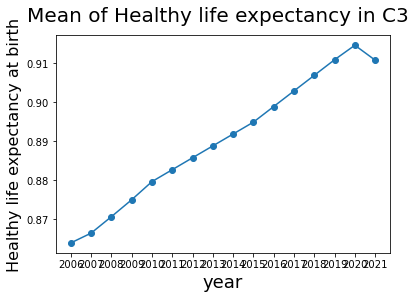

In [11]:
c3_health_avg_trend = get_yrly_avg_dict(df_c3, years, col_item = 'Healthy life expectancy at birth')
print(c3_health_avg_trend)
plot_by_dict(c3_health_avg_trend, "Mean of Healthy life expectancy in C3", "year", "Healthy life expectancy at birth")

# Differencing Plot

array([<AxesSubplot:>], dtype=object)

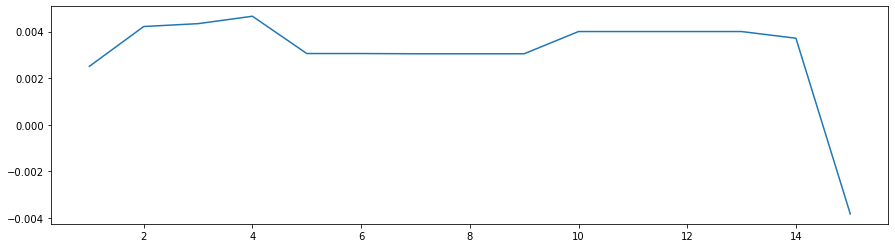

In [12]:
ser = pd.Series(c3_health_avg_trend.values())
ser.diff().plot(subplots=True, figsize=(15,4))

# ACF, PACF Analysis

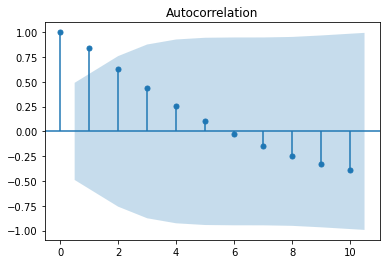

In [13]:
plot_acf_by_dict(c3_health_avg_trend, lags=10)

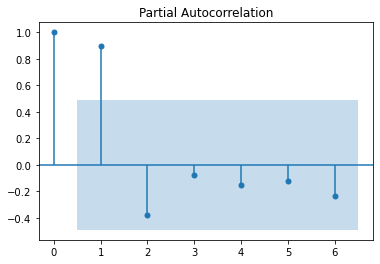

In [14]:
plot_pacf_by_dict(c3_health_avg_trend, lags=6)

# ARIMA Model Analysis

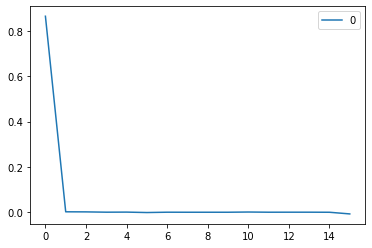

In [15]:
c3_avg = []
for a in c3_health_avg_trend.values():
    c3_avg.append(a)
    
c3_model = ARIMA(c3_avg, order=(1,1,1))
c3_model_fit = c3_model.fit()

residuals = DataFrame(c3_model_fit.resid)
residuals.plot()
plt.show()

# ARIMA Model Prediction

In [16]:
X = np.asarray(c3_avg)
X

array([0.86387007, 0.86637931, 0.87059729, 0.87493842, 0.8795977 ,
       0.88265599, 0.88571429, 0.88876232, 0.89181034, 0.89485837,
       0.89886084, 0.9028633 , 0.90686576, 0.91086823, 0.91458321,
       0.91075508])

predicted=0.904245, expected=0.906866
predicted=0.908898, expected=0.910868
predicted=0.912381, expected=0.914583
predicted=0.916800, expected=0.910755
Test RMSE: 0.004


C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


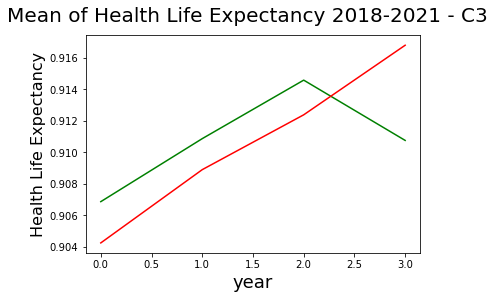

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# split into train and test sets
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
fig = plt.figure()
fig.suptitle('Mean of Health Life Expectancy 2018-2021 - C3', fontsize=20)
plt.xlabel('year', fontsize=18)
plt.ylabel('Health Life Expectancy', fontsize=16)
plt.plot(test, color='green')
plt.plot(predictions, color='red')
plt.show()

# Verify the Performance of the chosen model

In [18]:
import pmdarima as pm
pm_model = pm.auto_arima(c3_avg, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(pm_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-136.486, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-140.585, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-138.621, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-138.668, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-123.532, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.145 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  72.293
Date:                Tue, 06 Jul 2021   AIC                           -140.585
Time:                        00:29:12   BIC                           -139.169
Sample:                             0   HQIC                          -140.600
                                 - 16                                       

# Predict the Health Life Expectancy 2022 - 2026

In [19]:
all_countries_future_health = {}
future_years = [2022,2023,2024,2025,2026]

for country in c3_list:
    data = df_c3[df_c3['Country name'] == country]['Healthy life expectancy at birth']
    data.index = np.arange(2006, 2021+1)
    dis_dict = data.to_dict()
    X_ = list(data.values)
    single_future_data = {}
    
    for year in future_years:
        model = ARIMA(X_, order=(0,1,1))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        X_.append(yhat)
        single_future_data[year] = yhat
    
    all_countries_future_health[country] = single_future_data

C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_re

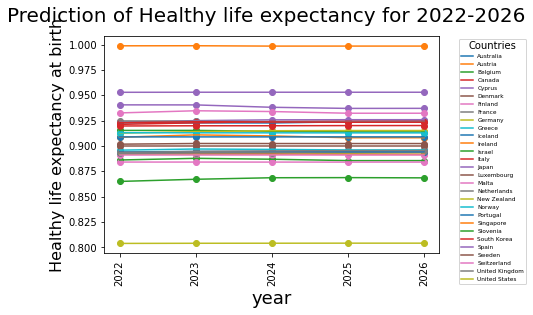

In [20]:
fig = plt.figure()
fig.suptitle("Prediction of Healthy life expectancy for 2022-2026", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("Healthy life expectancy at birth", fontsize=16)

for country in c3_list:
    dis_dict = all_countries_future_health[country]
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))
    plt.xticks(rotation=90)
    
fontP = FontProperties()
fontP.set_size('xx-small')
plt.legend(c3_list, title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

Text(0.5, 1.0, 'Trend of Healthy life expectancy for 2022-2026')

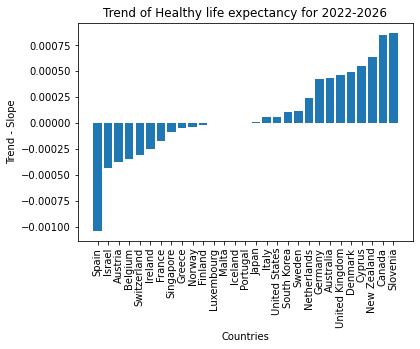

In [21]:
dis_dict = {}
for country in c3_list:
    data = list( all_countries_future_health[country].values() )
    index = list( all_countries_future_health[country].keys() )
    coeffs = np.polyfit(index, data, 1)
    slope = coeffs[-2]
    dis_dict[country] = slope

dis_dict = sort_dict(dis_dict)

health_support_keys = dis_dict.keys()
health_support_values = dis_dict.values()
plt.xticks(rotation=90)
plt.bar(health_support_keys, health_support_values)

plt.xlabel("Countries")
plt.ylabel("Trend - Slope")
plt.title("Trend of Healthy life expectancy for 2022-2026")

# Predict the GDP 2022-2026

In [22]:
all_countries_future_gdp = {}
future_years = [2022,2023,2024,2025,2026]

for country in c3_list:
    data = df_c3[df_c3['Country name'] == country]['Log GDP per capita']
    data.index = np.arange(2006, 2021+1)
    dis_dict = data.to_dict()
    X_ = list(data.values)
    single_future_data = {}
    
    for year in future_years:
        model = ARIMA(X_, order=(0,1,1))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        X_.append(yhat)
        single_future_data[year] = yhat
    
    all_countries_future_gdp[country] = single_future_data

C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaco

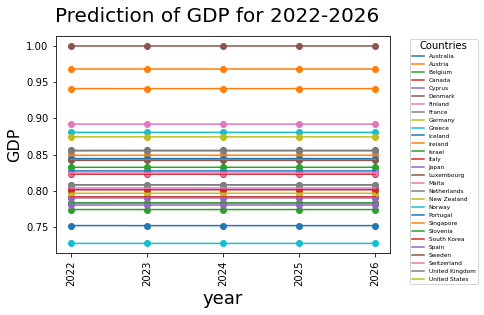

In [23]:
fig = plt.figure()
fig.suptitle("Prediction of GDP for 2022-2026", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("GDP", fontsize=16)

for country in c3_list:
    dis_dict = all_countries_future_gdp[country]
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))
    plt.xticks(rotation=90)
    
fontP = FontProperties()
fontP.set_size('xx-small')
plt.legend(c3_list, title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

{2022: 0.7903270753429187, 2023: 0.7903560035184509, 2024: 0.7903548142286013, 2025: 0.7903517805334589, 2026: 0.7903524967085245}


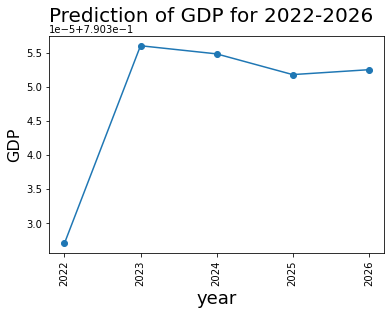

In [24]:
fig = plt.figure()
fig.suptitle("Prediction of GDP for 2022-2026", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("GDP", fontsize=16)
aaa = ['Japan']
for country in aaa:
    dis_dict = all_countries_future_gdp[country]
    print(dis_dict)
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))
    plt.xticks(rotation=90)
    
fontP = FontProperties()
fontP.set_size('xx-small')
# plt.legend(c3_list, title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

Text(0.5, 1.0, 'Trend of GDP for 2022-2026')

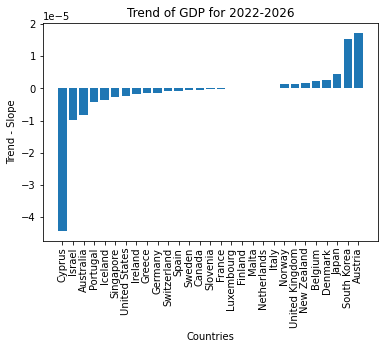

In [25]:
dis_dict = {}
for country in c3_list:
    data = list( all_countries_future_gdp[country].values() )
    index = list( all_countries_future_gdp[country].keys() )
    coeffs = np.polyfit(index, data, 1)
    slope = coeffs[-2]
    dis_dict[country] = slope

dis_dict = sort_dict(dis_dict)

health_support_keys = dis_dict.keys()
health_support_values = dis_dict.values()
plt.xticks(rotation=90)
plt.bar(health_support_keys, health_support_values)

plt.xlabel("Countries")
plt.ylabel("Trend - Slope")
plt.title("Trend of GDP for 2022-2026")

# Seasonal Analysis

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = pd.Series(c3_health_avg_trend)
# result = seasonal_decompose(series, model='additive', period=1)
# result.plot()

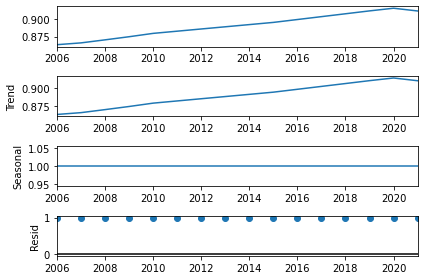

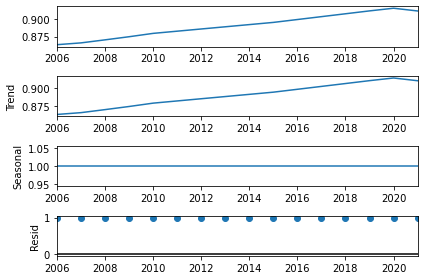

In [27]:
result = seasonal_decompose(series, model='multiplicative',period=1)
result.plot()

In [28]:
# c1_health_avg_trend = get_yrly_avg_dict(df_c1, years, col_item = 'Healthy life expectancy at birth')
# print(c1_health_avg_trend)
# plot_by_dict(c1_health_avg_trend, "Mean of Healthy life expectancy in C1", "year", "Healthy life expectancy at birth")

# 2. Condition of Health by Countries

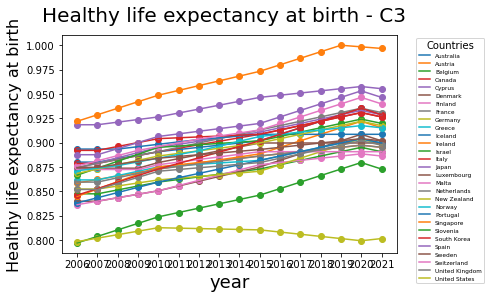

In [29]:
fig = plt.figure()
fig.suptitle("Healthy life expectancy at birth - C3", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("Healthy life expectancy at birth", fontsize=16)

for country in c3_list:
    data = df_c3[df_c3['Country name'] == country]['Healthy life expectancy at birth']
    data.index = np.arange(2006, 2021+1)
    dis_dict = data.to_dict()
    
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))

fontP = FontProperties()
fontP.set_size('xx-small')
plt.legend(c3_list, title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

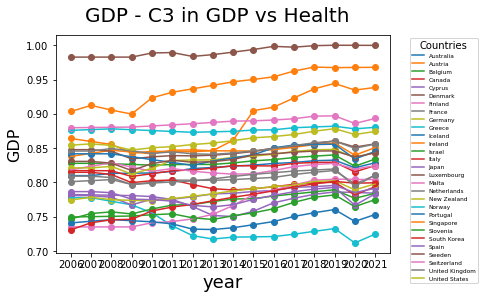

In [30]:
fig = plt.figure()
fig.suptitle("GDP - C3 in GDP vs Health", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("GDP", fontsize=16)

for country in c3_list:
    data = df_c3[df_c3['Country name'] == country]['Log GDP per capita']
    data.index = np.arange(2006, 2021+1)
    dis_dict = data.to_dict()
    
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))

fontP = FontProperties()
fontP.set_size('xx-small')
plt.legend(c3_list, title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

In [31]:
# fig = plt.figure()
# fig.suptitle("Healthy life expectancy at birth-Invalid Data", fontsize=20)
# plt.xlabel("year", fontsize=18)
# plt.ylabel("Healthy life expectancy at birth", fontsize=16)


# invalid = ['Somalia', 'Maldives', 'Central African Republic', 'Gambia', 
#                      'Lesotho', 'North Cyprus', 'Syria', 'Comoros', 'Belize'
#                      , 'Cuba', 'Oman', 'Suriname', 'Djibouti', 
#                      'Somaliland region', 'Kosovo', 'Palestinian Territories',
#                      'Burundi', 'Qatar', 'South Sudan', 'Swaziland', 'Bhutan',
#                      'Taiwan Province of China', 'Hong Kong S.A.R. of China',
#                      'Angola', 'Namibia', 'Libya', 'Trinidad and Tobago', 
#                      'Sudan', 'Jamaica', 'Guyana']

# invalid_countries = list(set(invalid) & set(c3_list))

# for country in invalid_countries:
# #     data = df_c3[df_c3['Country name'] == country]['Log GDP per capita']
#     data = df_c3[df_c3['Country name'] == country]['Healthy life expectancy at birth']
#     data.index = np.arange(2006, 2021+1)
#     dis_dict = data.to_dict()
    
#     plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
#     plt.plot(range(len(dis_dict)), list(dis_dict.values()))
#     plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))

# fontP = FontProperties()
# fontP.set_size('xx-small')
# plt.legend(invalid_countries, title='Places', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
# plt.show()

# 3. Forecastability of SocialSupport for C3 Countries

In [32]:
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
#         print(N, " ", m)
        if (N - m + 1) == 0:
             return np.nan
        return (N - m + 1)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

<BarContainer object of 29 artists>

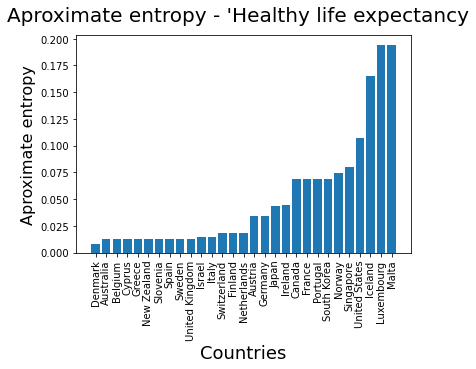

In [33]:
AE_dict = {}

for country in c3_list:
    data = df_c3[df_c3['Country name'] == country]['Healthy life expectancy at birth']
    data.index = np.arange(0, 16)
    AE = ApEn(data, m=2, r=0.2*np.std(data))
    AE_dict[country] = AE


# The Lower the approximate entropy, 
# the Easier it is to forecast it. 
Sorted_AE_dict = sort_dict(AE_dict)


fig = plt.figure()
fig.suptitle("Aproximate entropy - 'Healthy life expectancy", fontsize=20)
plt.xlabel("Countries", fontsize=18)
plt.ylabel("Aproximate entropy", fontsize=16)

AE_keys = Sorted_AE_dict.keys()
AE_values = Sorted_AE_dict.values()
plt.xticks(rotation=90)
plt.bar(AE_keys, AE_values)

<BarContainer object of 29 artists>

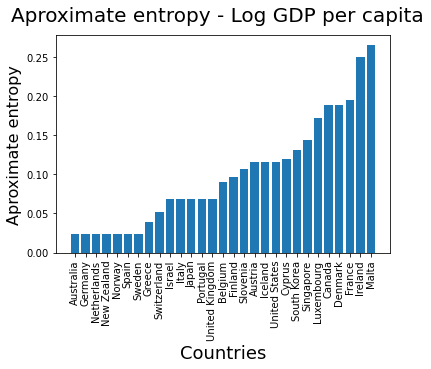

In [34]:
AE_dict = {}

for country in c3_list:
    data = df_c3[df_c3['Country name'] == country]['Log GDP per capita']
    data.index = np.arange(0, 16)
    AE = ApEn(data, m=2, r=0.2*np.std(data))
    AE_dict[country] = AE


# The Lower the approximate entropy, 
# the Easier it is to forecast it. 
Sorted_AE_dict = sort_dict(AE_dict)


fig = plt.figure()
fig.suptitle("Aproximate entropy - Log GDP per capita", fontsize=20)
plt.xlabel("Countries", fontsize=18)
plt.ylabel("Aproximate entropy", fontsize=16)

AE_keys = Sorted_AE_dict.keys()
AE_values = Sorted_AE_dict.values()
plt.xticks(rotation=90)
plt.bar(AE_keys, AE_values)

# 4. Trend of Previous Data - Slope:

In [35]:
def trendline(data, order=1):
    coeffs = np.polyfit(data.index.values, list(data), order)
    slope = coeffs[-2]
    return float(slope)

Text(0.5, 1.0, 'Trend of Healthy life expectancy')

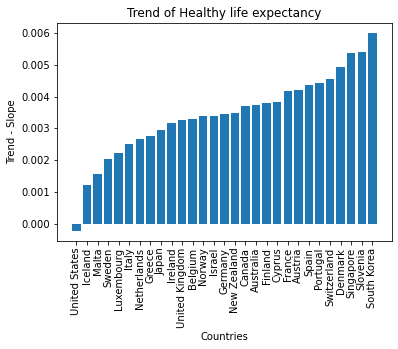

In [36]:
health_support_trend_dict = {}
for country in c3_list:
    data = df_c3[df_c3['Country name'] == country]['Healthy life expectancy at birth']
    health_support_trend_dict[country] = trendline(data)

health_support_trend_dict = sort_dict(health_support_trend_dict)

health_support_keys = health_support_trend_dict.keys()
health_support_values = health_support_trend_dict.values()
plt.xticks(rotation=90)
plt.bar(health_support_keys, health_support_values)

plt.xlabel("Countries")
plt.ylabel("Trend - Slope")
plt.title("Trend of Healthy life expectancy")

Text(0.5, 1.0, 'Trend of GDP')

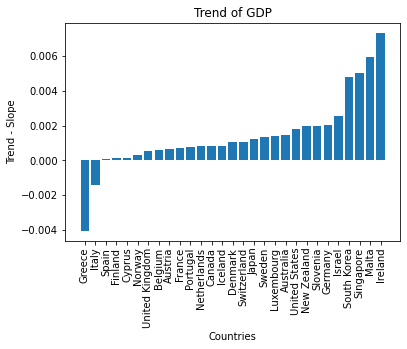

In [37]:
gdp_trend_dict = {}
for country in c3_list:
    data = df_c3[df_c3['Country name'] == country]['Log GDP per capita']
    gdp_trend_dict[country] = trendline(data)

gdp_trend_dict = sort_dict(gdp_trend_dict)

gdp_keys = gdp_trend_dict.keys()
gdp_values = gdp_trend_dict.values()
plt.xticks(rotation=90)
plt.bar(gdp_keys, gdp_values)

plt.xlabel("Countries")
plt.ylabel("Trend - Slope")
plt.title("Trend of GDP")

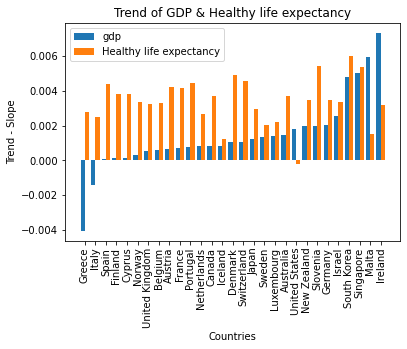

In [38]:
plt.xticks(rotation=90)

hle_values_sorted_by_gdp = []

X = list(gdp_keys)


for country in X:
    hle_values_sorted_by_gdp.append(health_support_trend_dict[country])

X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, gdp_values, 0.4, label = 'gdp')
plt.bar(X_axis + 0.2, hle_values_sorted_by_gdp, 0.4, label = 'Healthy life expectancy')
  
plt.xticks(X_axis, X)
plt.xlabel("Countries")
plt.ylabel("Trend - Slope")
plt.title("Trend of GDP & Healthy life expectancy")
plt.legend()
plt.show() 